In [2]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import requests
from io import BytesIO




In [6]:
q = '''
SELECT *
FROM bun_adp_engine.adp_ak_product_imp_count
'''
imp_origin = pd.read_sql(q, con=bun_rec)

q = '''
SELECT *
FROM bun_adp_engine.adp_ak_product_view_count
'''
view_origin = pd.read_sql(q, con=bun_rec)

In [7]:
imp = imp_origin[imp_origin['rank'] == 1]
view = view_origin[view_origin['rank'] == 1]

eff = pd.merge(imp, view, on='keyword')

In [9]:
import numpy as np

eff = eff[['keyword', 'content_id_x', 'imp_count', 'content_id_y', 'view_count']]
eff['ctr'] = np.array(eff['view_count'].astype(float))/np.array(eff['imp_count'])

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
eff_sortby_view = eff.sort_values('view_count', ascending=False).reset_index()

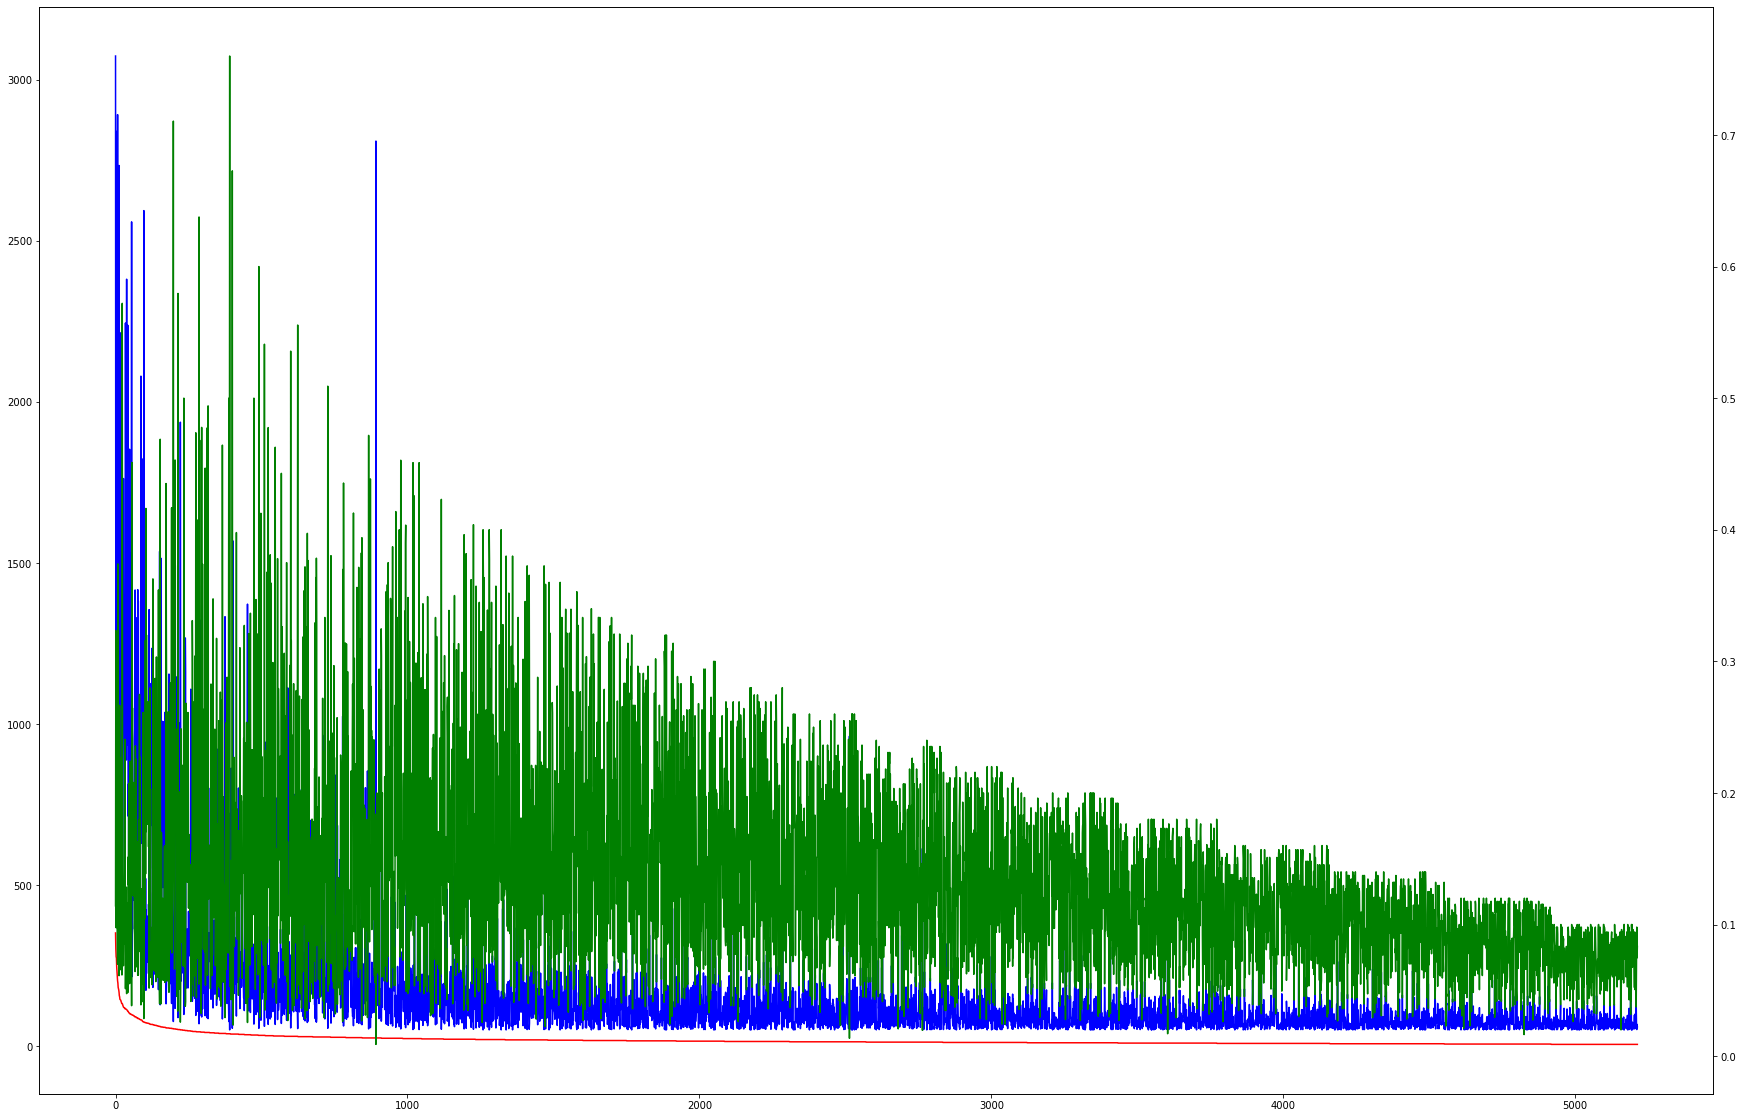

In [22]:

fig, ax1 = plt.subplots(figsize = (30,20))

ax1.plot(eff_sortby_view.index, eff_sortby_view['view_count'], color = 'red')
ax1.plot(eff_sortby_view.index, eff_sortby_view['imp_count'], color = 'blue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(eff_sortby_view.index, eff_sortby_view['ctr'], color = 'green')
ax2.tick_params(axis='y')

In [29]:
np.array(eff_sortby_view['ctr']) * 100 * 0.5 + np.array(eff_sortby_view['view_count']) * 0.1

array([ 5.81388889,  8.24637681,  8.22857143, ..., 10.95126904,
        5.12352941,  8.46268657])

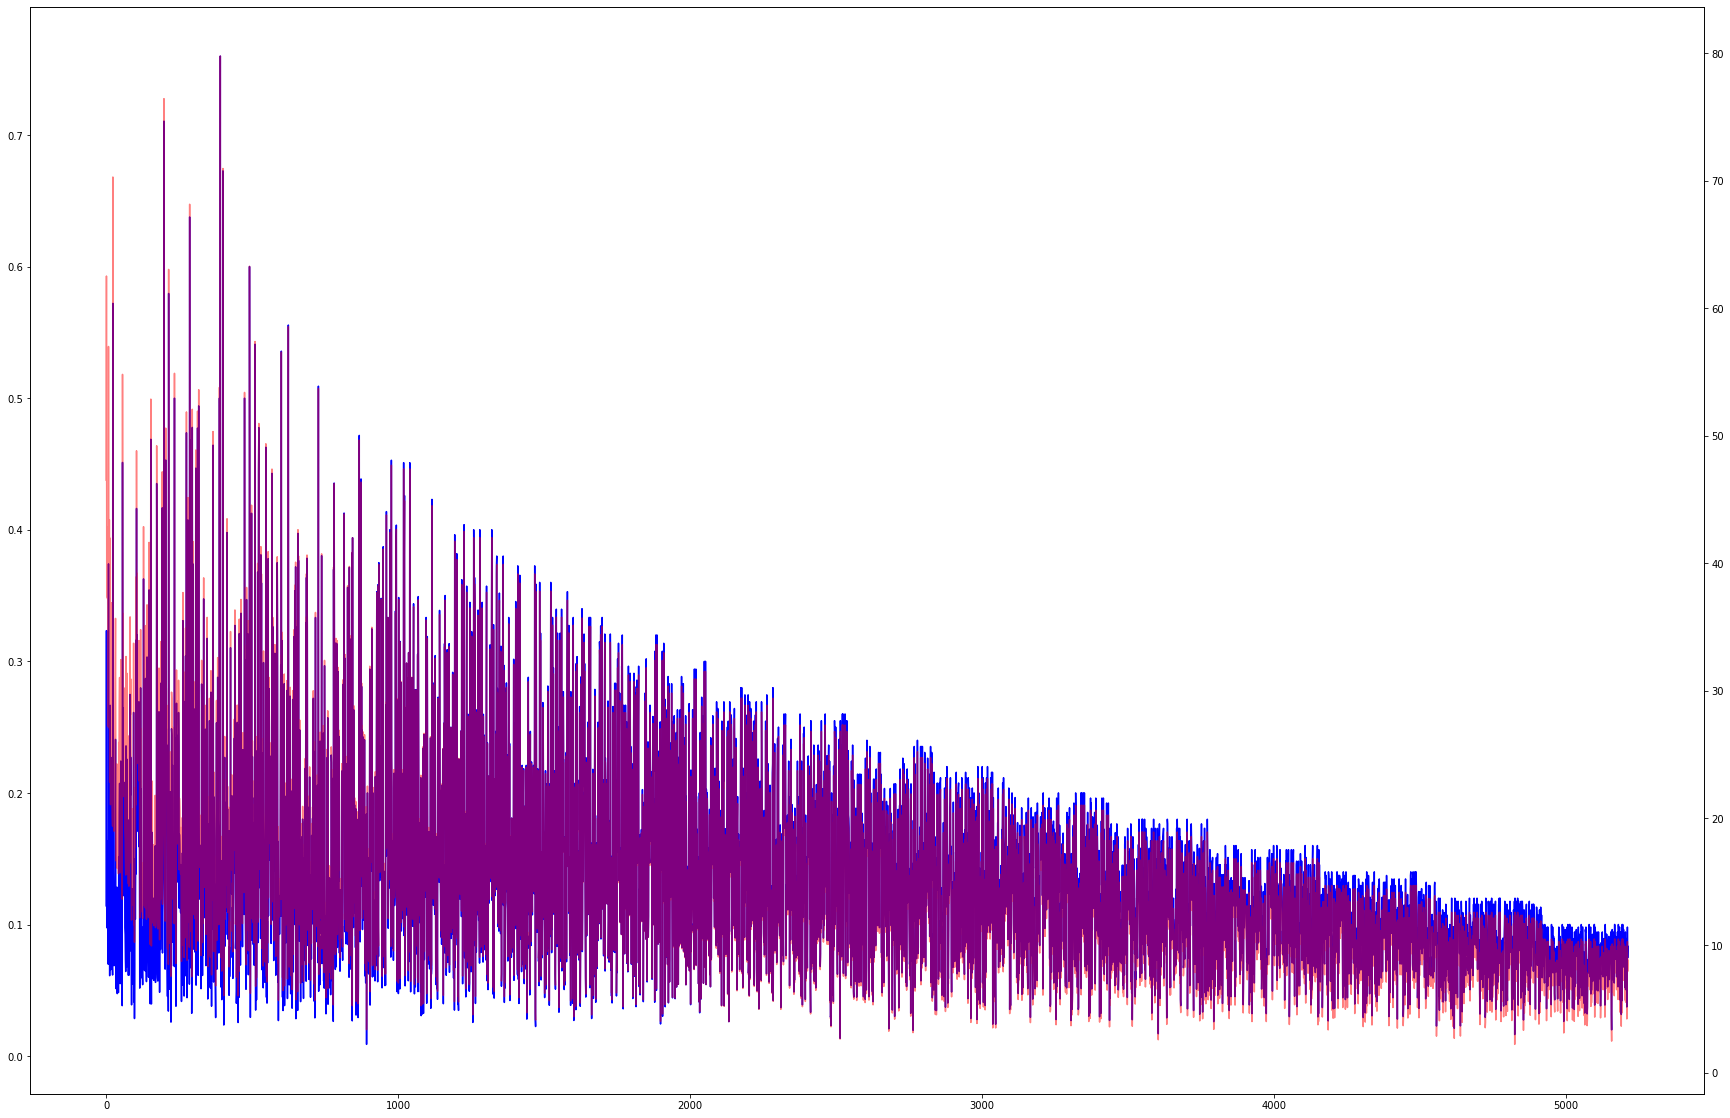

In [37]:

fig, ax1 = plt.subplots(figsize = (30,20))

ax1.plot(eff_sortby_view.index, eff_sortby_view['ctr'], color = 'blue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(eff_sortby_view.index, np.array(eff_sortby_view['ctr']) * 100\
         + np.array(eff_sortby_view['view_count']) * 0.1, color = 'red', alpha = 0.5)
ax2.tick_params(axis='y')

In [3]:
q = '''
SELECT *
FROM workspace.adp_temp2
'''
adp = pd.read_sql(q, con=bun_rec)

In [4]:
adp.sort_values('keyword')

,keyword,imp_count,view_count,ctr,max_ctr,max_view_count,ctr_scale,view_count_scale,temp_score
761,032c,76,13,0.171053,0.76,351,0.225069,0.037037,0.262106
762,10400,56,10,0.178571,0.76,351,0.234962,0.028490,0.263452
3529,105,72,6,0.083333,0.76,351,0.109649,0.017094,0.126743
3530,1050ti,56,6,0.107143,0.76,351,0.140977,0.017094,0.158071
763,1060,258,30,0.116279,0.76,351,0.152999,0.085470,0.238469
...,...,...,...,...,...,...,...,...,...
1822,히프나틱,170,13,0.076471,0.76,351,0.100619,0.037037,0.137656
3923,히피디피,113,34,0.300885,0.76,351,0.395901,0.096866,0.492767
1823,힌스,67,10,0.149254,0.76,351,0.196386,0.028490,0.224877
4644,힘콩,55,14,0.254545,0.76,351,0.334928,0.039886,0.374814


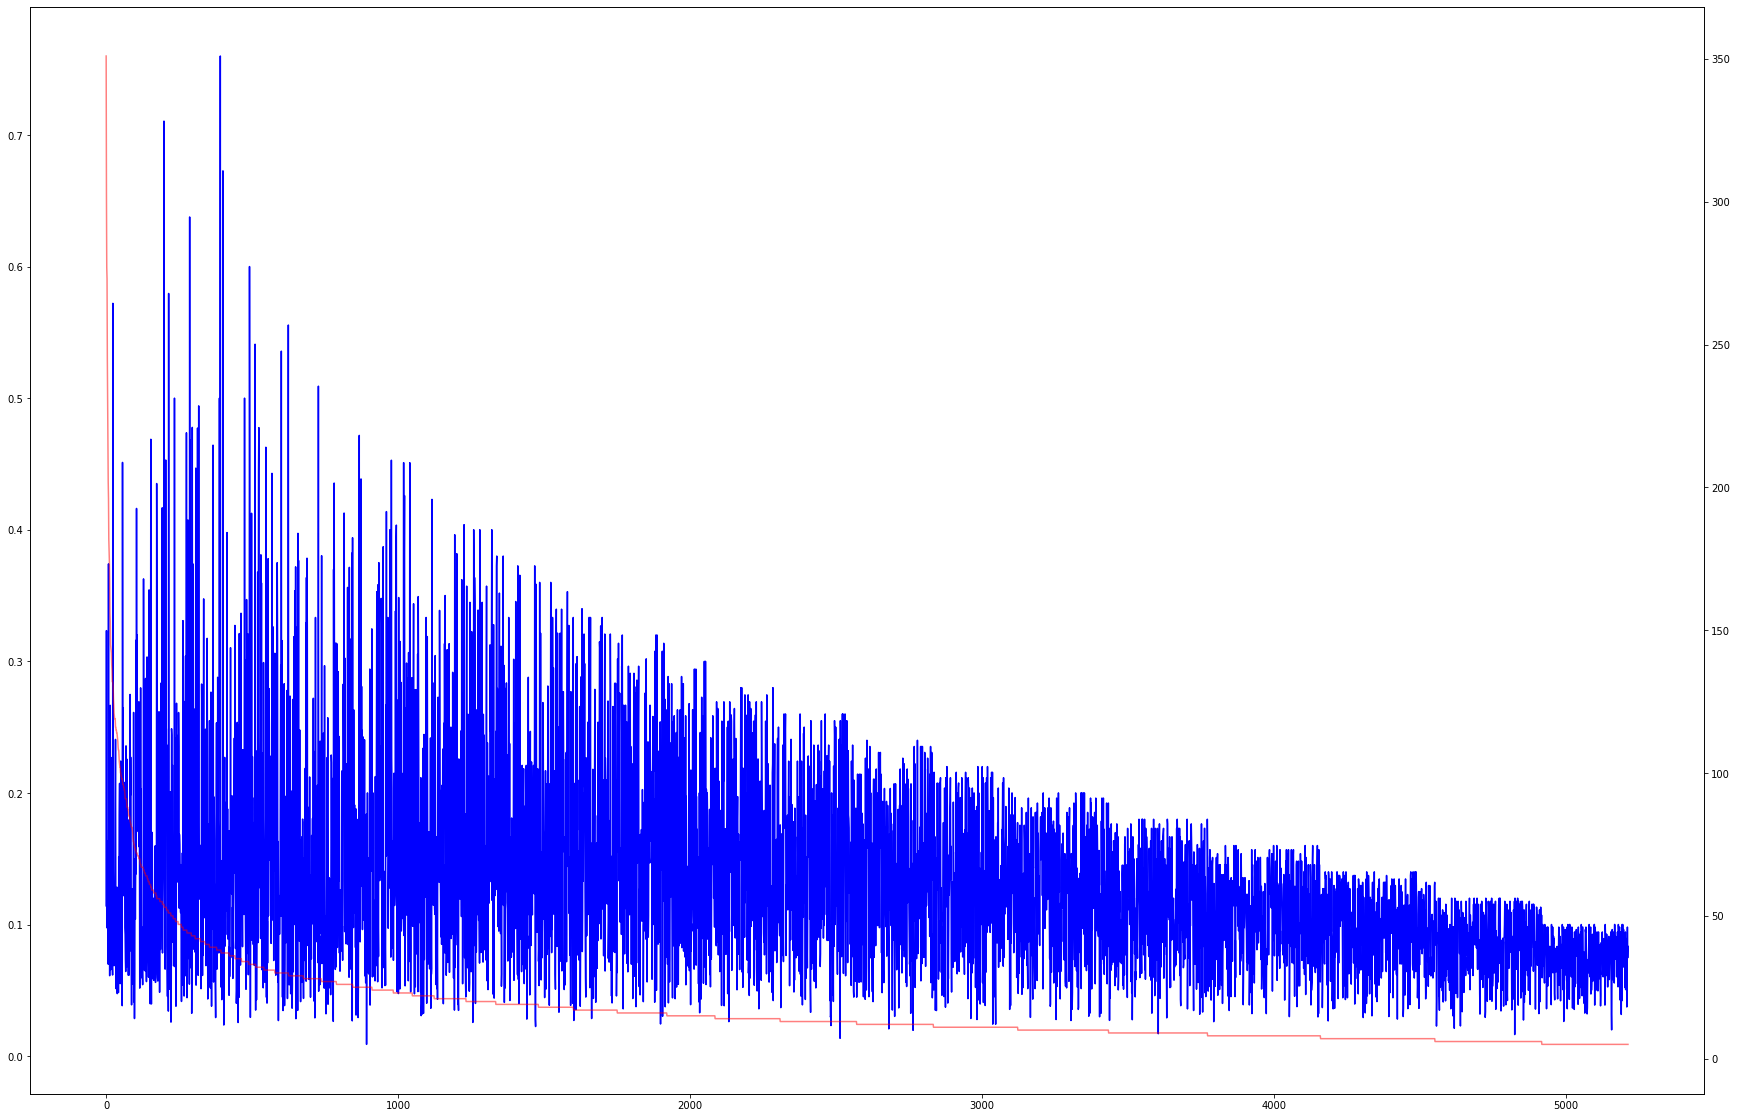

In [75]:

fig, ax1 = plt.subplots(figsize = (30,20))

ax1.plot(eff_sortby_view['ctr'], color = 'blue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(np.array(eff_sortby_view['view_count']), color = 'red', alpha = 0.5)
ax2.tick_params(axis='y')

(array([4.86e+03, 2.57e+02, 5.50e+01, 2.50e+01, 6.00e+00, 4.00e+00,
        3.00e+00, 2.00e+00, 1.00e+00, 1.00e+00]),
 array([  5. ,  39.6,  74.2, 108.8, 143.4, 178. , 212.6, 247.2, 281.8,
        316.4, 351. ]),
 <a list of 10 Patch objects>)

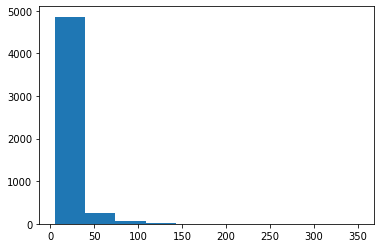

In [42]:
plt.hist(adp.view_count)

In [43]:
len(adp[adp['view_count']<=100])/len(adp)

0.9906022247794399

In [44]:
np.percentile(adp.temp_score, 30)

0.1496024979752761

In [45]:
np.percentile(adp.temp_score, 70)

0.2555359855191885

In [46]:
adp.temp_score.max()

1.28584684867791

In [47]:
adp.temp_score.min()

0.0386055616229143

In [48]:
adp.temp_score.mean()

0.22530828851300333

In [49]:
adp[adp.temp_score <= np.percentile(adp.temp_score, 30)]

,keyword,imp_count,view_count,ctr,max_ctr,max_view_count,ctr_scale,view_count_scale,temp_score
0,125,158,5,0.031646,0.76,351,0.041639,0.014245,0.055884
1,125cc,219,11,0.050228,0.76,351,0.066090,0.031339,0.097429
3,144,89,8,0.089888,0.76,351,0.118273,0.022792,0.141065
4,14k,972,26,0.026749,0.76,351,0.035196,0.074074,0.109270
6,14k목걸이,175,7,0.040000,0.76,351,0.052632,0.019943,0.072575
...,...,...,...,...,...,...,...,...,...
5200,호피,78,5,0.064103,0.76,351,0.084345,0.014245,0.098590
5202,혼다pcx125,72,6,0.083333,0.76,351,0.109649,0.017094,0.126743
5207,후드티,391,13,0.033248,0.76,351,0.043747,0.037037,0.080785
5209,휴먼메이드,75,7,0.093333,0.76,351,0.122807,0.019943,0.142750


In [51]:
adp[(adp.temp_score > np.percentile(adp.temp_score, 30)) & (adp.temp_score <= np.percentile(adp.temp_score, 70))]

,keyword,imp_count,view_count,ctr,max_ctr,max_view_count,ctr_scale,view_count_scale,temp_score
2,12프로맥스,55,8,0.145455,0.76,351,0.191388,0.022792,0.214180
5,14k 반지,57,6,0.105263,0.76,351,0.138504,0.017094,0.155598
8,1660super,80,8,0.100000,0.76,351,0.131579,0.022792,0.154371
13,2070,358,32,0.089385,0.76,351,0.117612,0.091168,0.208781
18,3090,72,11,0.152778,0.76,351,0.201023,0.031339,0.232362
...,...,...,...,...,...,...,...,...,...
5203,홀리선,163,16,0.098160,0.76,351,0.129157,0.045584,0.174741
5206,화장품 일괄,88,10,0.113636,0.76,351,0.149522,0.028490,0.178012
5208,휠,61,8,0.131148,0.76,351,0.172563,0.022792,0.195355
5211,히로아카,90,11,0.122222,0.76,351,0.160819,0.031339,0.192158


In [52]:
adp[(adp.temp_score > np.percentile(adp.temp_score, 70))]

,keyword,imp_count,view_count,ctr,max_ctr,max_view_count,ctr_scale,view_count_scale,temp_score
7,1650,80,19,0.237500,0.76,351,0.312500,0.054131,0.366631
14,2080ti,167,29,0.173653,0.76,351,0.228490,0.082621,0.311111
19,3900x,66,15,0.227273,0.76,351,0.299043,0.042735,0.341778
20,4k 모니터,64,12,0.187500,0.76,351,0.246711,0.034188,0.280899
23,75인치,56,11,0.196429,0.76,351,0.258459,0.031339,0.289798
...,...,...,...,...,...,...,...,...,...
5197,헬스기구,62,14,0.225806,0.76,351,0.297114,0.039886,0.337000
5199,호텔990,51,13,0.254902,0.76,351,0.335397,0.037037,0.372434
5204,홍미노트,76,14,0.184211,0.76,351,0.242382,0.039886,0.282268
5205,화라님,51,23,0.450980,0.76,351,0.593395,0.065527,0.658922


(array([1.445e+03, 2.335e+03, 9.220e+02, 3.340e+02, 1.220e+02, 3.200e+01,
        1.400e+01, 6.000e+00, 2.000e+00, 2.000e+00]),
 array([0.0088968 , 0.08400712, 0.15911744, 0.23422776, 0.30933808,
        0.3844484 , 0.45955872, 0.53466904, 0.60977936, 0.68488968,
        0.76      ]),
 <a list of 10 Patch objects>)

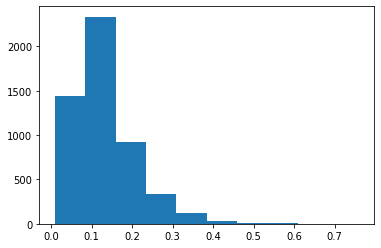

In [53]:
plt.hist(adp.ctr)

In [61]:
adp.ctr.mean()

0.13289198835373195

In [57]:
adp[adp['ctr'] >= 0.2][40:60]

,keyword,imp_count,view_count,ctr,max_ctr,max_view_count,ctr_scale,view_count_scale,temp_score
283,다크룸,64,20,0.312500,0.76,351,0.411184,0.056980,0.468164
284,다크모카 280,56,12,0.214286,0.76,351,0.281955,0.034188,0.316143
289,닷모드,77,29,0.376623,0.76,351,0.495557,0.082621,0.578178
320,듀퐁,95,24,0.252632,0.76,351,0.332410,0.068376,0.400786
325,드롭바,56,18,0.321429,0.76,351,0.422932,0.051282,0.474214
332,디스이즈네버댓 패딩,103,28,0.271845,0.76,351,0.357690,0.079772,0.437462
333,디스커버리 밀포드,70,14,0.200000,0.76,351,0.263158,0.039886,0.303044
345,라디에이터,68,14,0.205882,0.76,351,0.270898,0.039886,0.310784
348,라이프워크,79,18,0.227848,0.76,351,0.299800,0.051282,0.351082
352,라프시몬스 이스트팩,51,13,0.254902,0.76,351,0.335397,0.037037,0.372434


In [59]:
q = '''
SELECT *
FROM workspace.adp_temp3
'''
adp2 = pd.read_sql(q, con=bun_rec)

(array([ 636., 1575., 1025.,  472.,  208.,   66.,   21.,   10.,    2.,
           6.]),
 array([0.01634877, 0.0907139 , 0.16507902, 0.23944414, 0.31380926,
        0.38817439, 0.46253951, 0.53690463, 0.61126975, 0.68563488,
        0.76      ]),
 <a list of 10 Patch objects>)

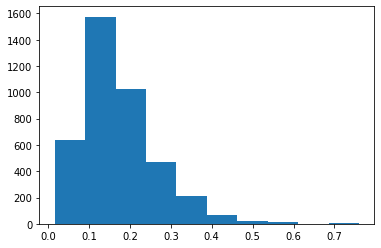

In [60]:
plt.hist(adp2.ctr)

In [62]:
adp2.ctr.mean()

0.1726311299789593

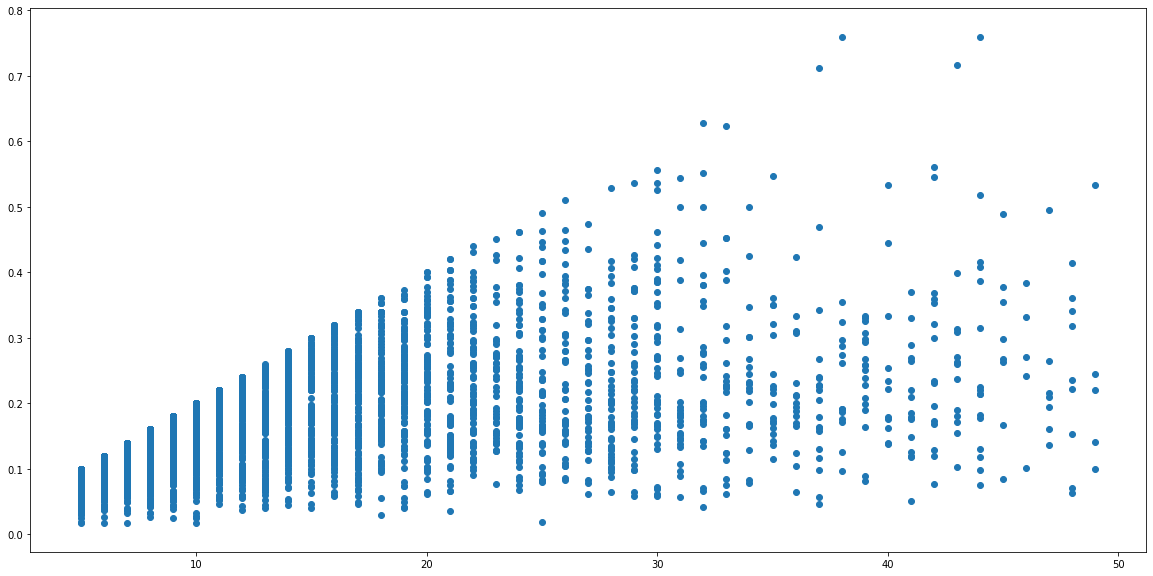

In [69]:
plt.figure(figsize=(20,10))
plt.scatter(adp2[adp2.view_count<50].view_count, adp2[adp2.view_count<50].ctr)

In [73]:
adp2[adp2['view_count'] <= 10].sort_values('ctr', ascending=False)

,keyword,imp_count,view_count,ctr,rnum
3884,헬로키티,50,10,0.200000,1
3236,모네마켓,50,10,0.200000,1
896,벨트패딩,50,10,0.200000,1
1380,카본mtb자전거,50,10,0.200000,1
3875,할리스 해리포터,50,10,0.200000,1
...,...,...,...,...,...
1856,싸인,266,5,0.018797,1
2772,팬티,400,7,0.017500,1
1328,인형,286,5,0.017483,1
60,mcm,591,10,0.016920,1


In [76]:
adp2.view_count.median()

13.0

In [77]:
adp2.view_count.mean()

17.941308132305398

In [78]:
adp2.view_count.describe()

count    4021.000000
mean       17.941308
std        19.026612
min         5.000000
25%         8.000000
50%        13.000000
75%        21.000000
max       302.000000
Name: view_count, dtype: float64

In [81]:
adp2.imp_count.describe()

count    4021.000000
mean      113.299428
std       125.623410
min        50.000000
25%        58.000000
50%        76.000000
75%       118.000000
max      2381.000000
Name: imp_count, dtype: float64

In [101]:
imp_index = []
for i in adp.imp_count.tolist():
    if i < adp.imp_count.quantile(0.25):
        imp_index.append(1)
    elif i >= adp.imp_count.quantile(0.25) and i < adp.imp_count.quantile(0.5):
        imp_index.append(2)
    elif i >= adp.imp_count.quantile(0.5) and i < adp.imp_count.quantile(0.75):
        imp_index.append(3)
    else:
        imp_index.append(4)

In [102]:
view_index = []
for i in adp.view_count.tolist():
    if i < adp.view_count.quantile(0.25):
        view_index.append(1)
    elif i >= adp.view_count.quantile(0.25) and i < adp.view_count.quantile(0.5):
        view_index.append(2)
    elif i >= adp.view_count.quantile(0.5) and i < adp.view_count.quantile(0.75):
        view_index.append(3)
    else:
        view_index.append(4)

In [103]:
adp['imp_index'] = imp_index
adp['view_index'] = view_index

In [104]:
adp['sub'] = np.array(view_index) - np.array(imp_index)

In [106]:
adp[adp['sub']>1]

,keyword,imp_count,view_count,ctr,max_ctr,max_view_count,ctr_scale,view_count_scale,temp_score,imp_index,view_index,sub
19,3900x,66,15,0.227273,0.76,351,0.299043,0.042735,0.341778,1,3,2
20,4k 모니터,64,12,0.187500,0.76,351,0.246711,0.034188,0.280899,1,3,2
24,88림,86,28,0.325581,0.76,351,0.428397,0.079772,0.508169,2,4,2
26,a30,58,14,0.241379,0.76,351,0.317604,0.039886,0.357490,1,3,2
29,be 앨범,51,13,0.254902,0.76,351,0.335397,0.037037,0.372434,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5179,하이브리드 릴 1.0,53,16,0.301887,0.76,351,0.397219,0.045584,0.442804,1,3,2
5182,하하하,55,14,0.254545,0.76,351,0.334928,0.039886,0.374814,1,3,2
5197,헬스기구,62,14,0.225806,0.76,351,0.297114,0.039886,0.337000,1,3,2
5199,호텔990,51,13,0.254902,0.76,351,0.335397,0.037037,0.372434,1,3,2


In [105]:
adp.groupby('sub')['keyword'].count()

sub
-3      31
-2     279
-1    1035
 0    2254
 1    1115
 2     447
 3      53
Name: keyword, dtype: int64

(array([  31.,  279.,    0., 1035.,    0., 2254., 1115.,    0.,  447.,
          53.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <a list of 10 Patch objects>)

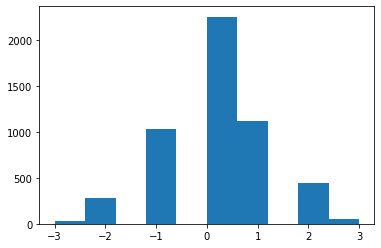

In [109]:
plt.hist(adp['sub'])

In [119]:
print(adp[adp['sub'] == -3]['ctr'].mean())
print(adp[adp['sub'] == -2]['ctr'].mean())
print(adp[adp['sub'] == -1]['ctr'].mean())
print(adp[adp['sub'] == 0]['ctr'].mean())
print(adp[adp['sub'] == 1]['ctr'].mean())
print(adp[adp['sub'] == 2]['ctr'].mean())
print(adp[adp['sub'] == 3]['ctr'].mean())

0.03107392055183888
0.04816690162825328
0.0737804622273852
0.11330193982959307
0.18229574453506306
0.27287829416117676
0.40594842937888737


In [110]:
imp_index = []
for i in adp.imp_count.tolist():
    if i < adp.imp_count.quantile(0.2):
        imp_index.append(1)
    elif i >= adp.imp_count.quantile(0.2) and i < adp.imp_count.quantile(0.4):
        imp_index.append(2)
    elif i >= adp.imp_count.quantile(0.4) and i < adp.imp_count.quantile(0.6):
        imp_index.append(3)
    elif i >= adp.imp_count.quantile(0.6) and i < adp.imp_count.quantile(0.8):
        imp_index.append(4)
    else:
        imp_index.append(5)

        
view_index = []
for i in adp.view_count.tolist():
    if i < adp.view_count.quantile(0.2):
        view_index.append(1)
    elif i >= adp.view_count.quantile(0.2) and i < adp.view_count.quantile(0.4):
        view_index.append(2)
    elif i >= adp.view_count.quantile(0.4) and i < adp.view_count.quantile(0.6):
        view_index.append(3)
    elif i >= adp.view_count.quantile(0.6) and i < adp.view_count.quantile(0.8):
        view_index.append(4)
    else:
        view_index.append(5)
        
adp['imp_index2'] = imp_index
adp['view_index2'] = view_index

adp['sub2'] = np.array(view_index) - np.array(imp_index)

(array([   7.,   95.,  412.,  991.,    0., 1895., 1119.,  520.,  157.,
          18.]),
 array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <a list of 10 Patch objects>)

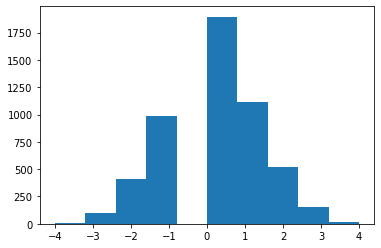

In [111]:
plt.hist(adp['sub2'])

In [113]:
adp.groupby('sub2')['keyword'].count()

sub2
-4       7
-3      95
-2     412
-1     991
 0    1895
 1    1119
 2     520
 3     157
 4      18
Name: keyword, dtype: int64

In [115]:
adp[adp['sub2'] == 0]

,keyword,imp_count,view_count,ctr,max_ctr,max_view_count,ctr_scale,view_count_scale,temp_score,imp_index,view_index,sub,imp_index2,view_index2,sub2
4,14k,972,26,0.026749,0.76,351,0.035196,0.074074,0.109270,4,4,0,5,5,0
5,14k 반지,57,6,0.105263,0.76,351,0.138504,0.017094,0.155598,1,1,0,1,1,0
8,1660super,80,8,0.100000,0.76,351,0.131579,0.022792,0.154371,2,2,0,2,2,0
13,2070,358,32,0.089385,0.76,351,0.117612,0.091168,0.208781,4,4,0,5,5,0
17,300,53,5,0.094340,0.76,351,0.124131,0.014245,0.138376,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,혼다cbr125,221,23,0.104072,0.76,351,0.136937,0.065527,0.202464,4,4,0,5,5,0
5203,홀리선,163,16,0.098160,0.76,351,0.129157,0.045584,0.174741,3,3,0,4,4,0
5206,화장품 일괄,88,10,0.113636,0.76,351,0.149522,0.028490,0.178012,2,2,0,3,3,0
5209,휴먼메이드,75,7,0.093333,0.76,351,0.122807,0.019943,0.142750,2,1,-1,2,2,0
